<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Tarea 3</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Fransisco Mena</h3>
    <h3 align="center">Camilo Sanchez Bravo</h3>
    <h3 align="center">201673586-0</h3>
    <h3 align="center">Gabriel Vergara Donoso</h3>
    <h3 align="center">201673605-0</h3>
    <h3 align="center">Enero 2020</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

## 1. Ensamblados para regresión

In [28]:
import pandas as pd
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row

In [29]:
...#procesamiento de fecha(datetime/timestamp) a numeros
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre
...#based on: https://en.wikipedia.org/wiki/Climate_of_India
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season']) #to one hot.. as nominal variable
... #any more information?
df.drop(["date"], axis=1, inplace=True) #delete date

In [30]:
y = df.pop("y_value").values
X = df.values 
X_train = X[:1000]
y_train = y[:1000]
X_val = X[1000:]
y_val = y[1000:]
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0) #shuffle values on train only

a) Describa el problema trabajado, la cantida de datos que se cuenta como las características a trabajar. Al ser datos temporales podría ayudar una ilustración gráfica de la secuencias trabajadas y su comportamiento ¿Es válido el uso de la información sólo del día anterior?.

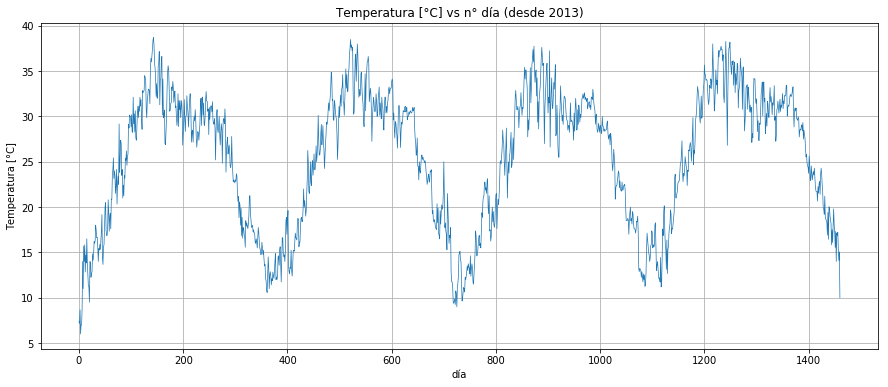

In [31]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,6))
plt.plot(y,linewidth=0.7)
plt.title("Temperatura [°C] vs n° día (desde 2013)")
plt.ylabel("Temperatura [°C]")
plt.xlabel("día")
plt.grid()
plt.show()

In [32]:
df.shape

(1461, 11)

In [33]:
df.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'cday', 'year',
       'month', 'season_fall', 'season_rainy', 'season_summer',
       'season_winter'],
      dtype='object')

El dataset contiene 1461 registros diferentes, cada uno con 11 atributos. En estos hay atributos de cuándo se hicieron, como el año, mes y estación, atributos que servirían (sobretodo mes y estación) para predecir rango de temperatura correcto. Los otros atributos son de caracteristicas medidas, como la temperatura y presión media, caracteristicas que están en una relación cercana con la temperatura y por lo tanto deberían ser significativos para predecir el valor de ella.

b) Entrene un solo Árbol de Regresión de múltiples niveles para resolver el problema. Defina un Árbol **no regularizado** (como el que no tiene límites en su profundidad) y otro Árbol **regularizado** (variando los hiper-parámetros que prefiera, por ejemplo, los más comunes como la profundidad, el número mínimo de datos para realizar *split* o el número mínimo de datos en cada hoja). Además comente sobre la ventaja de usar un árbol de decisión respecto a la escala de los datos ¿Porqué no es necesario escalar los datos?

In [34]:
import numpy as np
def RMSE(ytrue,ypred):
    return np.sqrt(np.mean(np.square(ytrue - ypred)) )
from sklearn.tree import DecisionTreeRegressor as Tree
model_unr = Tree() #unregularized model -- default parameters 
model_unr.fit(X_train,y_train)
... #define your regularized tree model
model1= Tree(max_depth=5,)#se define max_depth=5
model1.fit(X_train,y_train)
model2= Tree(max_depth=10,)#se define max_depth=10
model2.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

La ventaja de usar un árbol de decisión es que los datos no necesitan ser escalados. Esto es debido al funcionamiento de los árboles qué en cada nivel deciden, dependiendo del valor de la caracteristica x, que camino tomar hasta llegar a una hoja (splits binarios). Por este comportamiento, los árboles de decisión son invariantes frente a la escala de los datos.

c) Para evaluar la calidad de predicción en este problema se utilizará la métrica *Root Mean Squared Error* (RMSE), indicando un error en la escala real de la temperatura. Como los datos de validación siguen con el orden temporal, visualice esa predicción a lo largo del tiempo. Comente sobre los resultados comparando la regularización *vs* el no regularizar.

RMSE train=  1.5363107289102984
RMSE val=  1.770935280427461


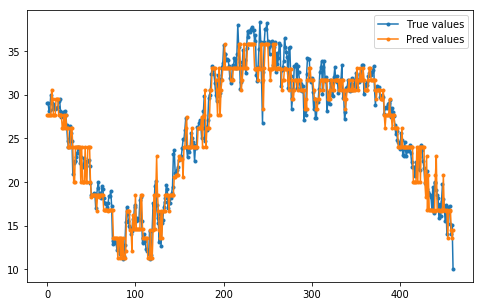

In [35]:
#Regularizado con max_depth=5
y_train_hat = model1.predict(X_train)
y_val_hat = model1.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()

RMSE train=  0.8225590812601147
RMSE val=  2.4083667221086302


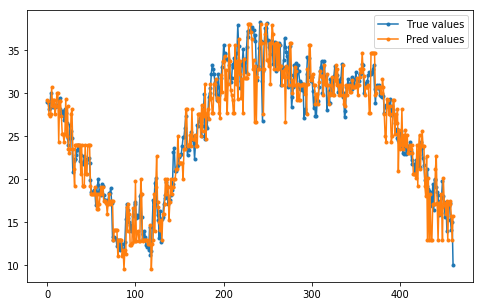

In [36]:
#Regularizado con max_depth=5
y_train_hat = model2.predict(X_train)
y_val_hat = model2.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.show()

RMSE train=  0.0
RMSE val=  2.435543756588614


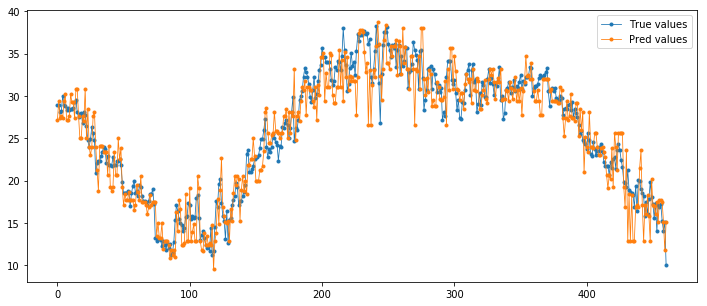

In [37]:
#No regularizado
y_train_hat = model_unr.predict(X_train)
y_val_hat = model_unr.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(y_val, '.-' ,label="True values",linewidth=0.8)
plt.plot(y_val_hat, '.-' ,label="Pred values",linewidth=0.8)
plt.legend()
plt.show()


Los primeros dos gráficos muestran las predicciones usando árboles regularizados (profundidad 5 y 10 respectivamente), mientras que el tercero es un árbol sin regularizar. A simple viste se observa que el primer árbol parece tener mejor predicción al tener los valores predichos más cerca de los reales, que es lo que nos entrega el RMSE, el cual es el menor error en el conjunto de prueba en comparación a los otros dos. En cambio, el que presenta el menor error de entrenamiento (0.0) es el árbol no regularizado, ya que al no estar límitado por regularizaciones se encarga de mejorar su resultado con esos datos, lo que provoca el mayor error en el conjunto de prueba (overfitting). Habiendo solo regularizado la profundidad, es posible que se mejore la predicción en el conjunto de prueba siendo exhaustivo en la regularización.

d) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **Bagging**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en b)*) ¿Qué debería suceder? ¿Se visualiza *overfitting*? Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro.

In [38]:
from sklearn.ensemble import BaggingRegressor
#Regularizado
rmse_train=[]
rmse_val=[]
for i in range(1,100):
    modelb = BaggingRegressor(base_estimator=Tree(max_depth=5), n_estimators=i, n_jobs=-1)#se define max_depth 5, n_estimators=9
    modelb.fit(X_train,y_train)
    y_train_hat = modelb.predict(X_train)
    y_val_hat = modelb.predict(X_val)
    #print("n:estimators: " +str(i))
    #print("\tRMSE train= ",RMSE(y_train,y_train_hat))
    #print("\tRMSE val= ",RMSE(y_val,y_val_hat))
    rmse_train.append(RMSE(y_train,y_train_hat))
    rmse_val.append(RMSE(y_val,y_val_hat))



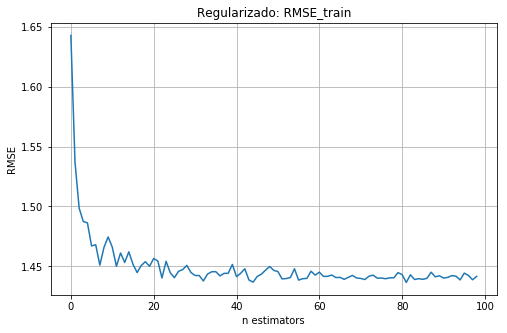

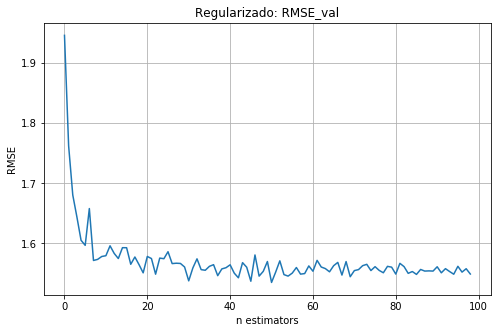

In [39]:
plt.figure(figsize=(8,5))
plt.plot(rmse_train)
plt.title("Regularizado: RMSE_train")
plt.ylabel("RMSE")
plt.xlabel("n estimators")
plt.grid()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(rmse_val)
plt.title("Regularizado: RMSE_val")
plt.ylabel("RMSE")
plt.xlabel("n estimators")
plt.grid()
plt.show()


In [40]:
#No regularizado
rmse_train=[]
rmse_val=[]
for i in range(1,100):
    modelb_unr = BaggingRegressor(base_estimator=Tree(), n_estimators=i, n_jobs=-1)#se define max_depth 5, n_estimators=9
    modelb_unr.fit(X_train,y_train)
    y_train_hat = modelb_unr.predict(X_train)
    y_val_hat = modelb_unr.predict(X_val)
    #print("n:estimators: " +str(i))
    #print("\tRMSE train= ",RMSE(y_train,y_train_hat))
    #print("\tRMSE val= ",RMSE(y_val,y_val_hat))
    rmse_train.append(RMSE(y_train,y_train_hat))
    rmse_val.append(RMSE(y_val,y_val_hat))


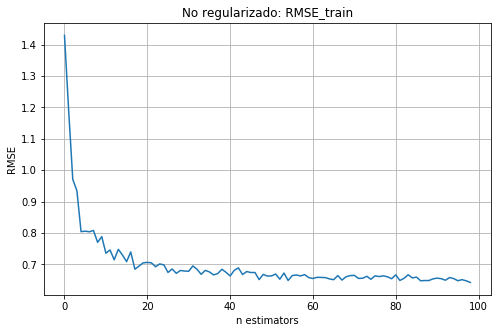

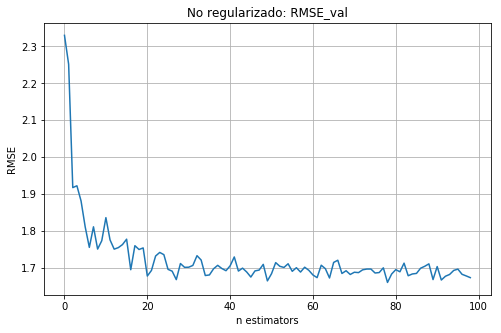

In [41]:
plt.figure(figsize=(8,5))
plt.plot(rmse_train)
plt.title("No regularizado: RMSE_train")
plt.ylabel("RMSE")
plt.xlabel("n estimators")
plt.grid()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(rmse_val)
plt.title("No regularizado: RMSE_val")
plt.ylabel("RMSE")
plt.xlabel("n estimators")
plt.grid()
plt.show()


Con la técnica de Bagging, la varianza debería disminuir por lo que RMSE (estimador de la varianza) del conjunto de prueba también, sobretodo en el árbol no regularizado al presentar alta varianza. Se observa que en ambos casos disminuyo RMSE del conjunto de prueba, mientras que RMSE de entrenamiento en el árbol no regularizado aumentó, lo que indicaría la disminución de overfitting en él.

e) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **AdaBoost**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en d)* ¿Se visualiza *overfitting*? ¿Qué técnica utiliza la librería de sklearn, *re-muestrear* o *pesar* ejemplos? ¿Qué le parece más sensato?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).

In [42]:
from sklearn.ensemble import AdaBoostRegressor
#Regularizado
rmse_train=[]
rmse_val=[]
for i in range(1,100):
    model = AdaBoostRegressor(base_estimator=Tree(max_depth=5), n_estimators=i)
    model.fit(X_train,y_train)
    y_train_hat = model.predict(X_train)
    y_val_hat = model.predict(X_val)
    #print("n:estimators: " +str(i))
    #print("\tRMSE train= ",RMSE(y_train,y_train_hat))
    #print("\tRMSE val= ",RMSE(y_val,y_val_hat))
    rmse_train.append(RMSE(y_train,y_train_hat))
    rmse_val.append(RMSE(y_val,y_val_hat))

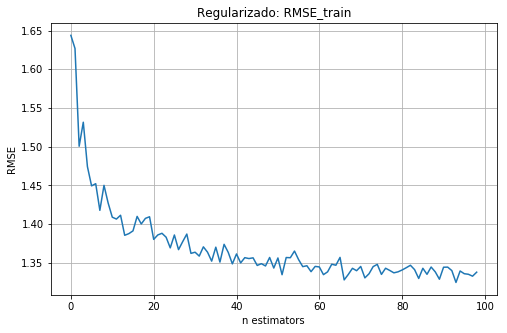

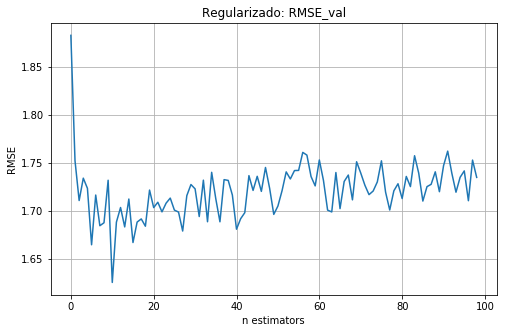

In [43]:
plt.figure(figsize=(8,5))
plt.plot(rmse_train)
plt.title("Regularizado: RMSE_train")
plt.ylabel("RMSE")
plt.xlabel("n estimators")
plt.grid()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(rmse_val)
plt.title("Regularizado: RMSE_val")
plt.ylabel("RMSE")
plt.xlabel("n estimators")
plt.grid()
plt.show()


In [44]:
#No Regularizado
rmse_train=[]
rmse_val=[]
for i in range(1,100):
    model = AdaBoostRegressor(base_estimator=Tree(), n_estimators=i)
    model.fit(X_train,y_train)
    y_train_hat = model.predict(X_train)
    y_val_hat = model.predict(X_val)
    #print("n:estimators: " +str(i))
    #print("\tRMSE train= ",RMSE(y_train,y_train_hat))
    #print("\tRMSE val= ",RMSE(y_val,y_val_hat))
    rmse_train.append(RMSE(y_train,y_train_hat))
    rmse_val.append(RMSE(y_val,y_val_hat))

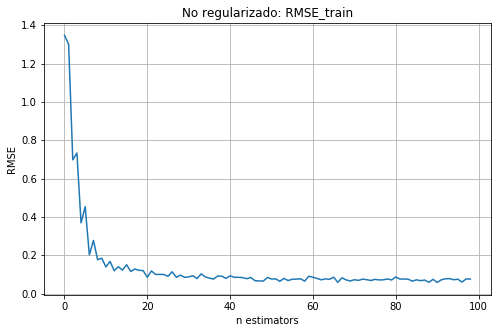

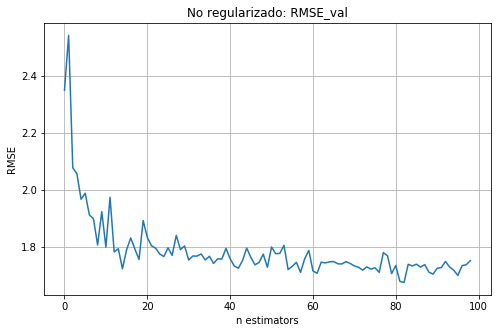

In [45]:
plt.figure(figsize=(8,5))
plt.plot(rmse_train)
plt.title("No regularizado: RMSE_train")
plt.ylabel("RMSE")
plt.xlabel("n estimators")
plt.grid()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(rmse_val)
plt.title("No regularizado: RMSE_val")
plt.ylabel("RMSE")
plt.xlabel("n estimators")
plt.grid()
plt.show()


Para el caso del arbol regularizado se observa  una notable varianza en los valores del RMSE, en  el no regularizado tambien se aprecia la varianza pero en menor medida. En el no regularizado se aprecia una notable diferencia entre el intervalo de valores de RMSE de entrenamiento y de validación, lo cual puede denotar overfitting. La libreria de sklearn utiliza la técnica de pesar ejemplos, con esto se concentra el aprendizaje en los casos más difíciles, lo cual es más sensato al ser solo un 10% los casos de acoso, por lo que debe ser más difícil clasificarlos

f) Pruebe otra técnica de ensamblado dedicada a árboles de decisión, que combina el muestreo *boostrap* de *Bagging* con muestreo sobre las *features*: **Random Forest**, compare el Árbol **no regularizado** con el **regularizado** ¿Se visualiza *overfitting*?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro.

In [46]:
from sklearn.ensemble import RandomForestRegressor
#Regularizado
rmse_train=[]
rmse_val=[]
for i in range(1,100):
    modelrf = RandomForestRegressor(n_estimators=i, max_depth = 3, n_jobs=-1)
    modelrf.fit(X_train,y_train)
    y_train_hat = modelrf.predict(X_train)
    y_val_hat = modelrf.predict(X_val)
    #print("n:estimators: " +str(i))
    #print("\tRMSE train= ",RMSE(y_train,y_train_hat))
    #print("\tRMSE val= ",RMSE(y_val,y_val_hat))
    rmse_train.append(RMSE(y_train,y_train_hat))
    rmse_val.append(RMSE(y_val,y_val_hat))

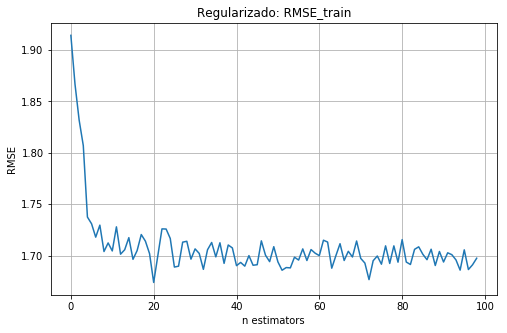

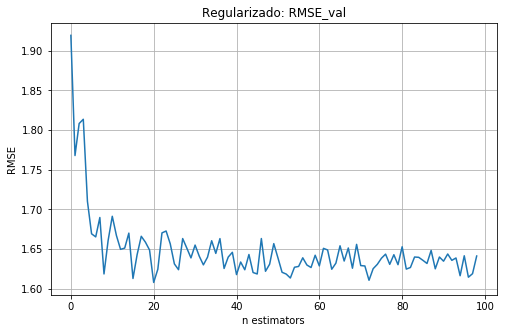

In [47]:
plt.figure(figsize=(8,5))
plt.plot(rmse_train)
plt.title("Regularizado: RMSE_train")
plt.ylabel("RMSE")
plt.xlabel("n estimators")
plt.grid()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(rmse_val)
plt.title("Regularizado: RMSE_val")
plt.ylabel("RMSE")
plt.xlabel("n estimators")
plt.grid()
plt.show()

In [48]:
#No Regularizado
rmse_train=[]
rmse_val=[]
for i in range(1,100):
    modelrf_unr = RandomForestRegressor(n_jobs=-1, n_estimators=i)
    modelrf_unr.fit(X_train,y_train)
    y_train_hat = modelrf_unr.predict(X_train)
    y_val_hat = modelrf_unr.predict(X_val)
    #print("n:estimators: " +str(i))
    #print("\tRMSE train= ",RMSE(y_train,y_train_hat))
    #print("\tRMSE val= ",RMSE(y_val,y_val_hat))
    rmse_train.append(RMSE(y_train,y_train_hat))
    rmse_val.append(RMSE(y_val,y_val_hat))

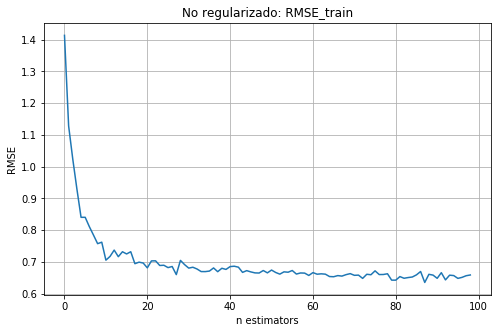

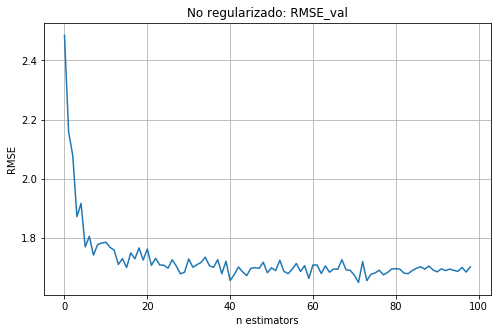

In [59]:
plt.figure(figsize=(8,5))
plt.plot(rmse_train)
plt.title("No regularizado: RMSE_train")
plt.ylabel("RMSE")
plt.xlabel("n estimators")
plt.grid()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(rmse_val)
plt.title("No regularizado: RMSE_val")
plt.ylabel("RMSE")
plt.xlabel("n estimators")
plt.grid()
plt.show()

Como viene sucediendo, usando árboles regularizados no se observa overfitting, donde los errores de ambos conjuntos están cercanos (siendo menor en el conjunto de prueba). En el caso de los no regularizados se sigue observando que el error en el conjunto de entrenamiento no llega a 0, pero si se mantiene bajo 0.7

g) Verifique que el **OOB error** (*out of bag error*) de los ensambladores que utilizan la técnica *boostrap* puede ser una alternativa como métrica de generalización, compare con el error calculado sobre el conjunto de validación (o en su defecto *cross validation*).

In [68]:
modelrf = RandomForestRegressor(warm_start=True, oob_score=True,n_estimators=20, max_depth = 3, n_jobs=-1)
modelrf.fit(X_train,y_train)
oob_error = modelrf.oob_score_
val_error = modelrf.score(X_val,y_val)
print("OOB error: ",oob_error)
print ("Val error: ",val_error)

OOB error:  0.9401472572692657
Val error:  0.9473838172781925


In [69]:
modelb = BaggingRegressor(base_estimator=Tree(max_depth=5), oob_score=True, n_estimators=i, n_jobs=-1)#se define max_depth 5, n_estimators=9
modelb.fit(X_train,y_train)
oob_error = modelb.oob_score_
val_error = modelb.score(X_val,y_val)
print("OOB error: ",oob_error)
print ("Val error: ",val_error)

OOB error:  0.9472559015531309
Val error:  0.9516197192040203



En ambos casos (árbol regularizado y no), se observa que el OOB error tiene un valor cercano al error calculado sobre el conjunto de validación, verificando que serviría como métrica. Esto porque el OOB error viene dado por los datos que no se usan en algún re-muestreo para entrenar

h) Defina otra forma de combinar los valores que entregan los ensamblados al hacer predicciones y compare con lo que se hace actualmente, por ejemplo *Bagging* realiza el voto de la mayoría para clasificación y promedio para regresión, *AdaBoost* realiza una combinación ponderada de cada clasificador dependiendo de su *habilidad* (desempeño para clasificar el conjunto de entrenamiento). Se puede inspirar desde clásicos estadísticos, como entregar el primer cuartíl ($Q_1$) si al ensamblado le cuesta predecir valores bajos, o el segundo cuartil ($Q_2$) o mediana para ser robusto a predicciones atípicas de modelos. 

In [71]:
import random
def combine_predictions(predictions):  
    return random.choice(predictions)
list_estimators = model.estimators_
list_predictions = [estimator.predict(X_val) for estimator in list_estimators]
new_predictions = combine_predictions(list_predictions)
print("RMSE val= ",RMSE(y_val, new_predictions))

RMSE val=  2.4822851700695088


i) Si se cuenta con una gran cantidad de modelos en el ensamblado, por ejemplo $T>100$, se puede crear un intervalo de confianza de la predicción a través de todos estos valores, asumiendo una distribución Normal centrada en la media muestral de las predicciones, con desviación estándar muestral en las predicciones. El intervalo de confianza entrega más información que un único valor puntual de predicción. Visualice un intervalo de confianza al 95% de probabilidad en la predicción a lo largo de la serie de tiempo de validación, comente. Al asumir una distribución Normal, también puede explorar el tomar como predicción del ensamblado el muestreo sobre la distribución Normal creada entorno a los datos muestrales.

In [ ]:
X_val_est = np.vstack(list_predictions).T #has shape=(N_test, n_estimator), with n_estimator>100
from scipy.stats import norm
interv_val = []
for n in range(X_val.shape[0]):
    low, up = norm.interval(0.95, loc=np.mean(X_val_est[n]), scale=np.std(X_val_est[n]))
    interv_val.append([low,up])
interv_val = np.asarray(interv_val)
x = np.arange(X_val_est.shape[0])
plt.figure(figsize=(8,5))
plt.plot(x, np.mean(X_val_est, axis=1))
plt.fill_between(x, interv_val[:,0], interv_val[:,1], color='r', alpha=.55)
plt.show()

j) Evalúe y visualice la predicción del mejor modelo encontrado para resolver este problema, en el conjunto de pruebas. Además, compare y analice las distintas maneras con las que se resolvió el problema, incluya las decisiones que conlleva y los resultados que reflejan.

In [ ]:
df = pd.read_csv("DailyDelhiClimateTest.csv")

## 2. Detección de acoso en *Twitter*

In [ ]:
import pandas as pd
Td = pd.read_csv("Train_data.csv")
Td.columns

In [ ]:
from sklearn.model_selection import train_test_split
y = Td['harassment']
x = Td['tweet_content']
b_x_train, b_x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

In [ ]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words
x_train = [word_extractor(text) for text in b_x_train]
x_test = [word_extractor(text) for text in b_x_test]

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(x_train)
f_train = vectorizer.transform(x_train)
... #transform val and test
f_test = vectorizer.transform(x_test)
##
vocab = vectorizer.get_feature_names()
dist=list(np.array(f_train.sum(axis=0)).reshape(-1,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
model= LogisticRegression()
classes_weights = {0: 1, 1: 50}
model.set_params(class_weight=classes_weights)
model.set_params(C=10)
model.fit(f_train,y_train)
y_pred = model.predict(f_test)
y_pred

In [ ]:
from  sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='binary')

In [ ]:
model.score(f_test,y_test)

In [ ]:
Test = pd.read_csv("Test_input.csv")
b_x_final = Test['tweet_content']
x_final = [word_extractor(text) for text in b_x_final]
f_final = vectorizer.transform(x_final)

In [ ]:
y_predf = model.predict(f_final)
y_predf

In [ ]:
df_aux = pd.DataFrame()
df_aux["id"] = np.arange(1, 1+y_predf.shape[0])
df_aux["harassment"] = y_predf.astype('int')
df_aux.to_csv("test_estimation.csv", index=False)